# 개요

In [1]:
# 세가지 추가 주제
# 1. 공선성이라는 문제를 제기하는 상관관계가 높은 관측치를 처리
# 2. 예/아니오 또는 제품 구매와 같은 이진 결과에 대한 모델 적합화
# 3. 샘플 전체로서가 아닌 개별적 선호도와 응답을 찾는 모델을 알아보기
#    마케팅에서는 종종 개별 소비자와 사람들 사이의 행동과 제품 관심의 다양성을 이해하길 원함
#    등급 기반 결합 분석 데이터에서 소비자 선호도에 대한 계층적 선형 모델 살펴보기

# 고도로 상관된 변수 처리

In [2]:
# 고도로 상관된 설명 변수는 선형 모델에 문제를 일으킴
# 이유와 문제 해결

In [1]:
# 예시 데이터 임포트
import pandas as pd
cust_df = pd.read_csv('http://bit.ly/PMR-ch8pt1')
cust_df.head()

,cust_id,age,credit_score,email,distance_to_store,online_visits,online_trans,online_spend,store_trans,store_spend,sat_service,sat_selection
0,1,22.894369,630.608883,yes,2.582494,20,3,58.429989,4,140.323213,3.0,3.0
1,2,28.049944,748.574644,yes,48.175989,121,39,756.880083,0,0.000000,3.0,3.0
2,3,35.879417,732.545858,yes,1.285712,39,14,250.328006,0,0.000000,NaN,NaN
3,4,30.527395,829.588862,yes,5.253992,1,0,0.000000,2,95.911944,4.0,2.0
4,5,38.735747,733.796825,no,25.044693,35,11,204.693314,0,0.000000,1.0,1.0


In [2]:
cust_df.describe(include='all')

,cust_id,age,credit_score,email,distance_to_store,online_visits,online_trans,online_spend,store_trans,store_spend,sat_service,sat_selection
count,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,659.000000,659.000000
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,500.500000,34.922050,725.488402,NaN,14.655254,28.293000,8.385000,170.318241,1.323000,47.582099,3.069803,2.400607
std,288.819436,4.944598,50.248973,NaN,22.936412,53.579678,15.997334,327.813183,1.612846,67.963508,0.868907,0.894291
min,1.000000,19.341341,542.970848,NaN,0.213602,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,250.750000,31.427312,691.695470,NaN,3.338284,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000
50%,500.500000,35.104230,725.457422,NaN,7.131707,6.000000,2.000000,37.029027,1.000000,30.053884,3.000000,2.000000
75%,750.250000,38.200034,757.201286,NaN,16.658860,31.000000,9.000000,177.888022,2.000000,66.489555,4.000000,3.000000


In [3]:
# 온라인 지출이 있는 사람과의 연관성에 관심

# summary 결과
# 1. 온라인 지출은 온라인 거래수와 밀접한 관련이 있지만 온라인 방문 수와는 밀접한 관련이 없음
# 2. 모델은 사용가능한 거의 모든 분산, r-squared = .98을 설명
# 3. store_trans의 표준 오차는 상당히 큼 (std err)

import statsmodels.formula.api as smf
spend_m1 = smf.ols(
    'online_spend ~ age + credit_score + email + distance_to_store +\
     online_visits + online_trans+store_trans+store_spend+sat_service+sat_selection',
    data=cust_df.loc[cust_df.online_spend > 0, 'age':]
).fit()

spend_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           online_spend   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     2363.
Date:                Sun, 26 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:34:03   Log-Likelihood:                -2157.5
No. Observations:                 418   AIC:                             4337.
Df Residuals:                     407   BIC:                             4381.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             6.7189     33.538      0.200      0.841     -59.210      72.648
email[T.yes]         -5.6893      5.807     -0.980      0.328     -17.104       5.725
age                   0.4228      0.451      0.938      0.349      -0.463       1.309
credit_score         -0.0337      0.044     -0.766      0.444      -0.120       0.053
distance_to_store    -0.0435      0.101     -0.433      0.665      -0.241       0.154
online_visits        -0.0723      0.204     -0.354      0.723      -0.473       0.329
online_trans         20.6107      0.667     30.880      0.000      19.299      21.923
store_trans           0.1350      3.212      0.042      0.966      -6.179       6.449
store_spend           0.0018      0.079      0.023      0.982      -0.153       0.157
sat_service           5.6388      3.016      1.870      0.062      -0.290      11.568
sat_selection        -4.3706      2.909     -1.502      0.134     -10.089       1.348
==============================================================================
Omnibus:                       85.767   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1424.804
Skew:                          -0.279   Prob(JB):                    4.05e-310
Kurtosis:                      12.028   Cond. No.                     1.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

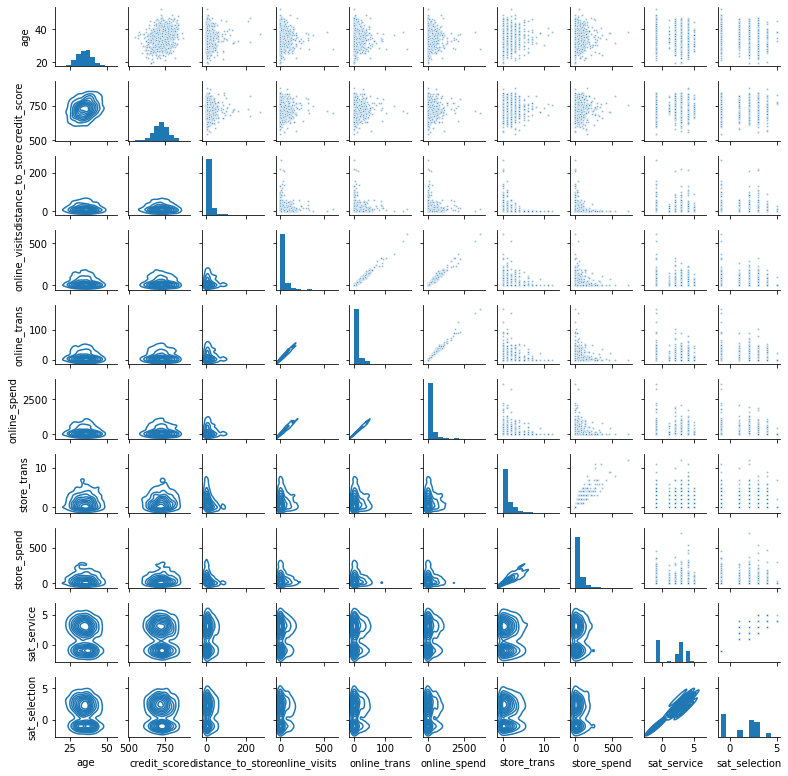

In [4]:
# why?
# PairGrid를 통해서 확인
# -> 극도로 치우친 변수와 상관성이 매우 높은 변수 쌍을 보여줌

import seaborn as sns
import matplotlib.pyplot as plt

g = sns.PairGrid(cust_df.loc[:, 'age':].fillna(-1), height=1.1)
g.map_upper(plt.scatter, linewidths=-1, edgecolor="w", s=5, alpha=.5)
g.map_diag(plt.hist)
g.map_lower(sns.kdeplot)

## box-cox이용하여 데이터를 변환 (중요)

In [5]:
import scipy.stats as ss
import sklearn.preprocessing as pp
def autotransform(x):
    x_bc, lmbd = ss.boxcox(1 + x) # 변환 람다를 자동으로 선택
    return pp.scale(x_bc) # 데이터를 표준화

In [9]:
# 고객 ID 열 삭제
# 온라인 지출이 양수인 행만 가져오기

idx_complete = (cust_df.isna().sum(axis=1)==0) # axis=1 기준 null인 값은 빠짐
cust_df_bc = cust_df.loc[
    (idx_complete) & (cust_df.online_spend > 0),
    'age':
].copy()
col_idx = cust_df_bc.columns != 'email'
cust_df_bc.iloc[:,col_idx] = cust_df_bc.iloc[:,col_idx].apply(autotransform) 

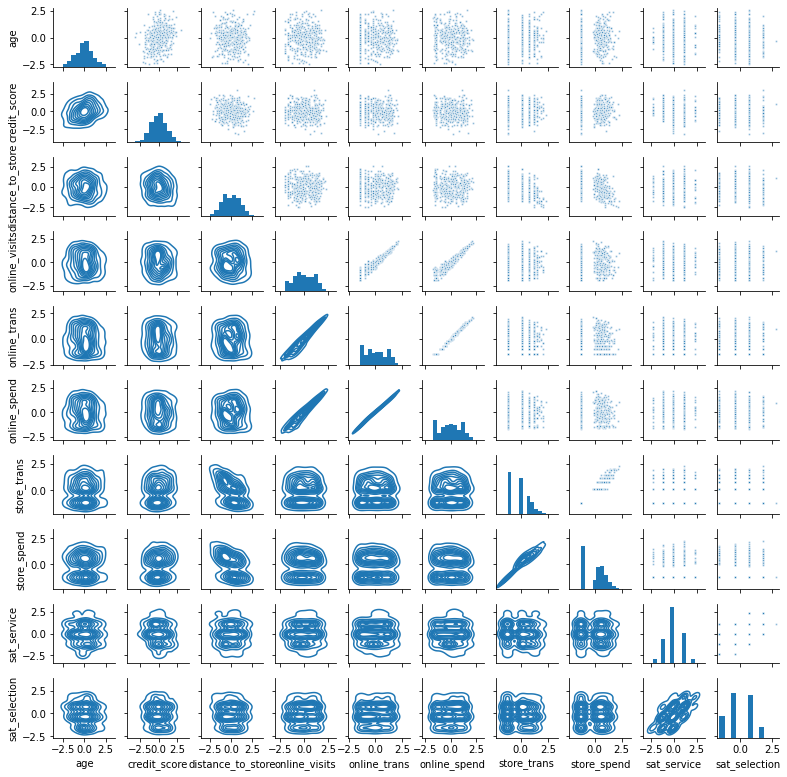

In [10]:
# PairGrid로 다시 확인

g = sns.PairGrid(cust_df_bc, height=1.1)
g.map_upper(plt.scatter, linewidths=1, edgecolor='w', s=5, alpha=0.5)
g.map_diag(plt.hist)
g.map_lower(sns.kdeplot)

In [11]:
# 변환된 데이터로 모델링
# 데이터를 표준화했기 때문에 계수가 작아짐
# 여전히 온라인 지출이 거래와 관련성이 높지만 온라인 방문과는 무관하다는 추정치는 변경되지 않음

spend_m2 = smf.ols(
    'online_spend ~ age + credit_score + email + distance_to_store +\
     online_visits + online_trans+store_trans+store_spend+sat_service+sat_selection',
    data=cust_df_bc
).fit()
spend_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           online_spend   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     5110.
Date:                Sun, 26 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:53:11   Log-Likelihood:                 418.56
No. Observations:                 418   AIC:                            -815.1
Df Residuals:                     407   BIC:                            -770.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0035      0.011     -0.313      0.755      -0.026       0.019
email[T.yes]          0.0042      0.012      0.340      0.734      -0.020       0.028
age                   0.0015      0.005      0.322      0.747      -0.008       0.011
credit_score         -0.0039      0.005     -0.839      0.402      -0.013       0.005
distance_to_store    -0.0031      0.005     -0.598      0.550      -0.013       0.007
online_visits         0.0067      0.016      0.415      0.678      -0.025       0.038
online_trans          0.9892      0.016     61.297      0.000       0.957       1.021
store_trans          -0.0068      0.018     -0.385      0.701      -0.041       0.028
store_spend           0.0079      0.017      0.458      0.647      -0.026       0.042
sat_service           0.0048      0.005      0.884      0.377      -0.006       0.016
sat_selection         0.0006      0.005      0.112      0.911      -0.010       0.011
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.063
Skew:                          -0.030   Prob(JB):                        0.969
Kurtosis:                       2.992   Cond. No.                         8.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# 단순히 트랜잭션 수만으로 지출을 예측하는 모델
# 모델 적합치 간의 작은 차이는 매우 낮은 F 통계량에 반영되므로 모델 간에 차이가 없다는 귀무가설을 기각할 수 없음
# 매우 낮은 F 통계량 -> 정의되지 않은 p값으로 이어짐

spend_m3 = smf.ols(
    'online_spend ~ online_trans',
    data=cust_df_bc
).fit()
from statsmodels.stats import anova as sms_anova
sms_anova.anova_lm(spend_m2, spend_m3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,407.0,3.303249,0.0,NaN,NaN,NaN
1,416.0,3.330058,-9.0,-0.02681,0.372126,NaN


In [14]:
# 여기서의 문제는 공선성
# 방문과 거래는 매우 관련성이 높음
# 선형 모델은 효과가 가산적이라고 가정하기 때문에 한 변수에 기인한 효과가 높은 상관관계를 가진 다른 변수에 공동으로 기여할 수 없음
# 이로 인해 예측 변수의 표준 오차가 증가해 계수 추정치가 매우 불확실하거나 불안정함
# 실제 결과로 기본 관계가 동일하더라도 데이터의 사소한 변동으로 인해 계수 추정치가 샘플마다 크게 다를 수있음

## 공선성 수정

In [15]:
# 데이터의 공선성 정도는 분산 팽창 계수로 평가할 수 있음 (VIF)
# 다른 변수와의 공유 분산으로 인해 선형 모델 계수의 "표준 오차 (분산) 를 얼마나 증가시키는지 추정"
# statsmodels 라이브러리의 variance_inflation_factor()를 사용해 VIF 구하기
# exog 속성을 인수로 사용
# 평가할 항을 나타내는 인덱스 값 exog_idx가 필요 (0번째 인덱스는 절편에 해당)

In [16]:
# 첫 번째 계수에 대한 VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
variance_inflation_factor(spend_m2.model.exog, 1)

1.050593451060347

In [20]:
# 모든 계수에 대하여 보기
# 코드를 함수화 시키기

def print_variance_inflation_factors(model):
    for i, param in enumerate(model.params.index):
        print ('VIF: {:.3f}, Parameter: {}'.format(
                variance_inflation_factor(model.model.exog, i), 
                param
        ))
        
print_variance_inflation_factors(spend_m2)

VIF: 6.504, Parameter: Intercept
VIF: 1.051, Parameter: email[T.yes]
VIF: 1.095, Parameter: age
VIF: 1.112, Parameter: credit_score
VIF: 1.375, Parameter: distance_to_store
VIF: 13.354, Parameter: online_visits
VIF: 13.413, Parameter: online_trans
VIF: 15.977, Parameter: store_trans
VIF: 15.254, Parameter: store_spend
VIF: 1.524, Parameter: sat_service
VIF: 1.519, Parameter: sat_selection


In [21]:
# 일반적인 경험 법칙은 VIF > 5.0은 공선성을 완화해야 됨
# 절편의 VIF는 쉽게 해석할 수 없기 때문에 일반적으로 절편 항은 무시함

# 공선성을 완화시키기 위한 3가지 일반적인 전략
# 1. 상관관계가 높은 변수는 생략
# 2. 상관관계가 높은 예측 변수 집합에 대한 주성분 또는 요인을 추출해 상관관계를 제거
# 3. 공선성에 안정적인 방법, 즉 기존의 선형 모델링이 아닌 다른 방법을 사용 (랜덤 포레스트)

### 상관관계 높은 변수 생략

In [22]:
#    현재 데이터에 대한 다른 옵션:
#    공선적 변수(거래당 지출)를 결합하는 새로운 관심 측정값을 구성

In [25]:
# spend_m4
# online_trans 변수가 빠짐

spend_m4 = smf.ols(
    'online_spend ~ age + credit_score + email + distance_to_store +\
     online_visits +store_trans+store_spend+sat_service+sat_selection',
    data=cust_df_bc
).fit()

spend_m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           online_spend   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     515.3
Date:                Sun, 26 Feb 2023   Prob (F-statistic):          1.20e-216
Time:                        17:24:30   Log-Likelihood:                -67.462
No. Observations:                 418   AIC:                             154.9
Df Residuals:                     408   BIC:                             195.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0628      0.036     -1.755      0.080      -0.133       0.008
email[T.yes]          0.0748      0.039      1.909      0.057      -0.002       0.152
age                  -0.0252      0.015     -1.718      0.087      -0.054       0.004
credit_score          0.0005      0.015      0.036      0.972      -0.029       0.030
distance_to_store    -0.0080      0.017     -0.484      0.629      -0.040       0.024
online_visits         0.9546      0.014     66.581      0.000       0.926       0.983
store_trans          -0.0489      0.056     -0.870      0.385      -0.159       0.062
store_spend           0.0504      0.055      0.917      0.360      -0.058       0.158
sat_service          -0.0084      0.017     -0.481      0.631      -0.042       0.026
sat_selection         0.0014      0.017      0.080      0.936      -0.033       0.036
==============================================================================
Omnibus:                       32.845   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.797
Skew:                          -0.615   Prob(JB):                     5.09e-10
Kurtosis:                       3.971   Cond. No.                         8.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# 이제는 VIF가 허용 가능함 (1.037)
# 높은 계수를 통해 온라인 방문 수가 여전히 온라인 지출의 가장 좋은 예측 변수라는 것을 알 수 있음

print_variance_inflation_factors(spend_m4)

VIF: 6.456, Parameter: Intercept
VIF: 1.041, Parameter: email[T.yes]
VIF: 1.085, Parameter: age
VIF: 1.111, Parameter: credit_score
VIF: 1.374, Parameter: distance_to_store
VIF: 1.037, Parameter: online_visits
VIF: 15.953, Parameter: store_trans
VIF: 15.229, Parameter: store_spend
VIF: 1.521, Parameter: sat_service
VIF: 1.519, Parameter: sat_selection


### 주성분 요소 사용 (9장에서 주성분 분석에 대해 자세히 논의)

In [27]:
# 주성분 분석은 다차원 데이터셋을 상관관계가 없는 성분으로 분해
# 따라서 PCA는 정의에 따라 동일한 PCA에 포함된 다른 변수와 공선성이 없는 복합 변수를 추출하는 방법을 제공
# 여기서는 PCA를 사용해 온라인 변수에 대한 첫 번째 구성 요소를 추출한 다음 상점 변수에 대해 이 작업을 다시 수행하고,
# 이 2개의 초기 구성 요소를 데이터프레임에 추가

In [30]:
from sklearn import decomposition

# PCA를 사용해 결합 온라인 변수 생성
online_pca = decomposition.PCA().fit_transform(cust_df_bc[['online_visits', 'online_trans']])
cust_df_bc['online'] = online_pca[:,0]

# PCA를 사용해 결합 상점 변수 생성
store_pca = decomposition.PCA().fit_transform(cust_df_bc[['store_spend', 'store_trans']])
cust_df_bc['store'] = store_pca[:,0]

In [31]:
# spend_m5 모델링
spend_m5 = smf.ols(
    'online_spend ~ age + credit_score + email + distance_to_store + online + store',
    data=cust_df_bc
).fit()

spend_m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           online_spend   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     2528.
Date:                Sun, 26 Feb 2023   Prob (F-statistic):          7.74e-321
Time:                        17:34:37   Log-Likelihood:                 166.61
No. Observations:                 418   AIC:                            -319.2
Df Residuals:                     411   BIC:                            -291.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0266      0.020     -1.308      0.192      -0.067       0.013
email[T.yes]          0.0317      0.022      1.423      0.156      -0.012       0.075
age                  -0.0122      0.008     -1.466      0.143      -0.028       0.004
credit_score          0.0003      0.008      0.033      0.973      -0.016       0.017
distance_to_store    -0.0037      0.009     -0.398      0.691      -0.022       0.014
online                0.7028      0.006    120.986      0.000       0.691       0.714
store                 0.0013      0.007      0.191      0.849      -0.012       0.014
==============================================================================
Omnibus:                       13.447   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.935
Skew:                          -0.311   Prob(JB):                     0.000210
Kurtosis:                       3.765   Cond. No.                         5.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# VIF는 이 모델에서 문제가 되지 않음
# 온라인 지출은 여전히 온라인 활동과 주로 연관돼 있음
print_variance_inflation_factors(spend_m5)

# BUT, 주성분을 설명 변수로 사용한 결과를 해석할 때 주의할 점은
# 성분이 임의의 숫자 방향을 갖는다는 것이다.

# online은 여기에서 음의 계수를 가질 수 있지만, 
# 반드시 온라인 활동이 매출 감소로 이어진다는 것을 의미하지는 않음

# 온라인 판매가 주로 온라인 활동과 관련된다는 결과는 흥미롭지 않지만
# 잘못된 결과보다는 확실한 결과를 얻는 것이 좋음


VIF: 6.447, Parameter: Intercept
VIF: 1.040, Parameter: email[T.yes]
VIF: 1.071, Parameter: age
VIF: 1.089, Parameter: credit_score
VIF: 1.332, Parameter: distance_to_store
VIF: 1.031, Parameter: online
VIF: 1.348, Parameter: store


# 이진 결과에 대한 선형 모델: 로지스틱 회귀

In [33]:
# 마케터는 종종 예/아니오라는 결과를 관찰
# -> 이진 (binary)
# -> logit 모델

## 로지스틱 모델의 기초

In [ ]:
# 로지스틱 모델은 결과 확률을 예측 변수의 지수 함수와 관련시킴
# 결과 확률을 모델링 시킴으로서
# 1. 특정 고객이 제품을 구매할 가능성이나 판촉에 응답할 세그먼트의 예상 비율과 같은 확률 혹은 비율인
#    관심 항목을 좀 더 직접적으로 모델링한다.
# 2. 비율에 대한 적절한 범위인 [0,1]로 모델 값을 제한한다. ols()로 생성된 기본 선형 모델에는 이러한 범위한도가 없음.

In [34]:
# 우도 계산
# y의 우도는 Vx가 음수일 때 50% 미만이고, Vx = 0일 때 50%이며, Vx가 양수이면 50% 이상이다.

import numpy as np
np.exp(0) / (np.exp(0) + 1)

0.5

In [35]:
from scipy.special import expit
expit(0)

0.5

In [36]:
expit(-np.inf)

0.0

In [37]:
expit(2)

0.8807970779778823

In [38]:
# 약한 우도
expit(-0.2)

0.45016600268752216

In [39]:
# 우도를 통한 로짓 모델 구하기
np.log(0.88/(1-0.88))

1.9924301646902063

In [41]:
from scipy.special import logit
logit(0.88)

1.9924301646902063

## 시즌 패스의 로지스틱 회귀 데이터

In [42]:
# 마케팅 질문: 시즌 패스가 번들(무료 주차 포함)로 제공될 때 구매 가능성이 더 높은지 여부

In [44]:
pass_df = pd.read_csv('http://bit.ly/PMR-ch8pt2')
pass_df.Pass = pass_df.Pass.astype(
    pd.api.types.CategoricalDtype(categories = ['YesPass', 'NoPass'],
                                  ordered=True)
)
pass_df.Promo = pass_df.Promo.astype(
    pd.api.types.CategoricalDtype(categories = ['NoBundle', 'Bundle'],
                                  ordered=True)
)

In [45]:
pass_df

,Channel,Promo,Pass
0,Mail,Bundle,YesPass
1,Mail,Bundle,YesPass
2,Mail,Bundle,YesPass
3,Mail,Bundle,YesPass
4,Mail,Bundle,YesPass
...,...,...,...
3151,Email,NoBundle,NoPass
3152,Email,NoBundle,NoPass
3153,Email,NoBundle,NoPass
3154,Email,NoBundle,NoPass


### 로지스틱 회귀 모델 적합화

In [46]:
# 로지스틱 회귀 모델은 선형 회귀와 유사한 프로세를 사용하는 일반화 선형 모델 GLM로 적합화
# GLM은 정규 분포가 아닌 종속 변수를 처리할 수 있다는 차이점이 있음.
# 일반화 선형 모델을 사용해 데이터 개수나 시간 간격 또는 이진 변수를 모델링 할 수 있음
# 모든 GLM 모델의 공통적인 특징은 연결(link) 함수를 사용해 정규 분포 예측 변수를 비정규 결과에 연결한다는 것
# 즉, 일관된 단일 프레임워크를 사용해 다양한 분포에 대한 모델을 적합화할 수 있음.

In [ ]:
# 현 예제의 경우 "이항 분포"
# glm()은 결과 변수에 대한 분포를 지정하는 family=인수를 취함
# 이진 결과의 경우 family=statsmodels.api.families.Binomial()

In [47]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

pass_m1 = smf.glm(
    'Pass ~ Promo', data=pass_df,
    family=sm.families.Binomial()
).fit()

pass_m1.summary()

# 최초 모델은 번들이 유효한 것으로 보임
# why? 번들 조건에 양의 계수가 있으면 효과는 통계쩍으로 유의하다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                         
=============================================================================================
Dep. Variable:     ['Pass[YesPass]', 'Pass[NoPass]']   No. Observations:                 3156
Model:                                           GLM   Df Residuals:                     3154
Model Family:                               Binomial   Df Model:                            1
Link Function:                                 Logit   Scale:                          1.0000
Method:                                         IRLS   Log-Likelihood:                -2172.7
Date:                               Sun, 26 Feb 2023   Deviance:                       4345.4
Time:                                       18:04:35   Pearson chi2:                 3.16e+03
No. Iterations:                                    4   Pseudo R-squ. (CS):           0.009324
Covariance Type:                           nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.1922      0.052     -3.683      0.000      -0.295      -0.090
Promo[T.Bundle]     0.3888      0.072      5.425      0.000       0.248       0.529
===================================================================================
"""

In [49]:
# 계수를 어떻게 사용?
# 성공률과 비성공의 비율을 조사해 판촉 번들 요소와 관련된 패스 판매의 연관성을 계산하는데 사용할 수 있음.

# "승산비" 구하기
# expit을 직접 사용

expit(0.3888) / (1-expit(0.3888))

1.4752094799309121

In [50]:
# 번들의 효과가 1.475의 예상 승산비라는 것을 알 수 있음. (번들은 승산비를 1.475배 높인다)
# 즉, 번들로 제공될 때 고객이 패스를 구매할 확률이 그렇지 않은 경우보다 1.475배 더 높다는 것을 의미함. 
# OR 계수를 지수화
np.exp(0.3888)

1.4752094799309121

In [51]:
# 각 조건의 구매 우도와 연계시키는 방법?

# 각 조건에서 모델 출력을 지수화해 각 조건에서 "승산비"(odds)를 구할 수 있음, expit()안의 숫자가 우도(likelihood) aka 계수
# 1. 번들이 아닌 경우에는 -0.1922
# 2. 번들인 경우에는 0.3888 - 0.1922

print("Odds of pass:no pass, bundle : {:.3f} : 1".format(np.exp(0.3888-0.1922)))
print("Odds of pass:no pass, without bundle : {:.3f} : 1".format(np.exp(-0.1922)))

Odds of pass:no pass, bundle : 1.217 : 1
Odds of pass:no pass, without bundle : 0.825 : 1


In [52]:
# 번들을 받은 개인 중 패스를 구입한 사람 1.217명당 그렇지 않은 사람이 1명
# 번들을 받지 않은 개인 중 패스를 구입한 사람 0.825명당 그렇지 않은 사람 1명

In [53]:
# 확률 (probability)
# 고객이 번들로 구매할 확률

np.exp(0.3888-0.1922)/ (1 + np.exp(0.3888-0.1922))

0.54899229916247

In [62]:
# 각 조건에서 패스를 구매할 우도 (probability 구하기)

prob_pass_with_bundle = (np.exp(0.3888-0.1922)/ (1 + np.exp(0.3888-0.1922)))
print("Probability of pass, bundle : {:.3f}".format(prob_pass_with_bundle))
prob_pass_without_bundle = (np.exp(-0.1922)/ (1 + np.exp(-0.1922)))
print("Probability of pass, no bundle: {:.3f}".format(prob_pass_without_bundle))

print('Odds ratio : {:.3f}'.format((prob_pass_with_bundle/(1-prob_pass_with_bundle))/(prob_pass_without_bundle/(1-prob_pass_without_bundle))))
print('Odds ratio : {:.3f}'.format(np.exp(0.3888)))


Probability of pass, bundle : 0.549
Probability of pass, no bundle: 0.452
Odds ratio : 1.475
Odds ratio : 1.475


In [63]:
# params를 이용해 계수 추출하고 exp()를 사용해 승산비 구하기

np.exp(pass_m1.params)

Intercept          0.825123
Promo[T.Bundle]    1.475196
dtype: float64

In [66]:
# 승산비에 대한 신뢰구간
np.exp(pass_m1.conf_int())

,0,1
Intercept,0.744890,0.913998
Promo[T.Bundle],1.281868,1.697681


In [67]:
# 판촉 번들의 승산비는 1.28에서 1.70 사이로 추정되면 상당한 긍정적인 효과를 보여줌
# -> 판촉이 매우 효과적?
# 반드시 그렇지는 않음
# 모델이 우리가 해석하고자 하는 것이라는 가정하에 효과가 추정됨
# Pass ~ Promo가 우리가 진정 해석하려는 모델인가?

## 모델제고

In [69]:
# 채널별 시즌 패스 구매 내역
# 시즌 티켓 판매에 가장 성공한 채널은 판촉 채공 여부와 관계없이 공원에서 판매하는 것

pass_df.groupby(['Pass']).Channel.value_counts().unstack()

Channel,Email,Mail,Park
Pass,,,
YesPass,65,601,923
NoPass,568,727,272


<AxesSubplot:ylabel='Pass'>

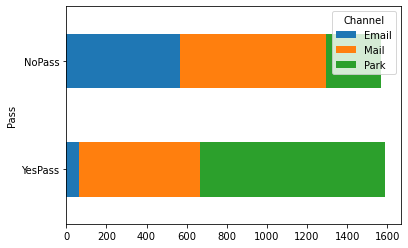

In [70]:
# 도식화
pass_df.groupby(['Pass']).Channel.value_counts().unstack().plot(kind='barh', stacked=True)

(0.0, 1.3)

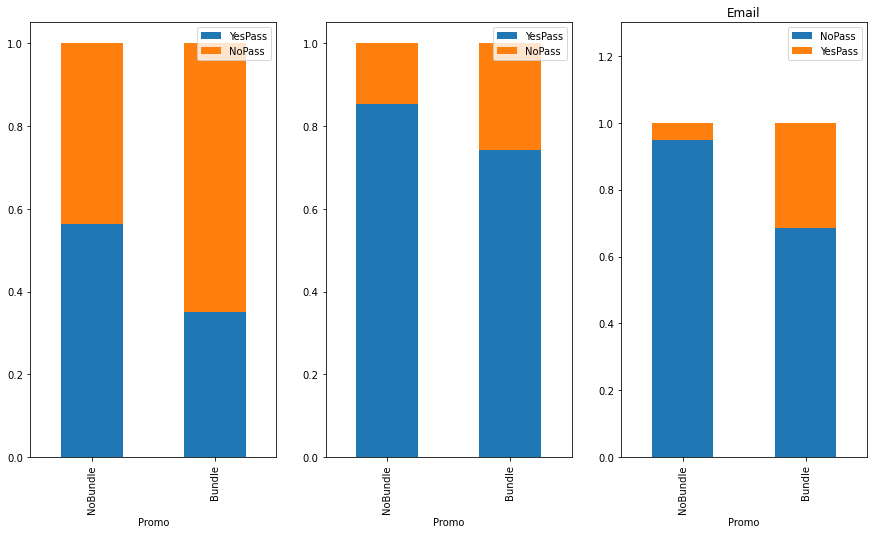

In [72]:
# 공원에서 패스가 가장 효과적으로 판매되는 것은 분명하지만, 번들은 어떤 효과를 가지고 있는가?
# 그리고 그것은 채널별로 어떻게 다른가?
# 도면화

#######################################################################
# 시즌 패스 판매는 공원에서 매우 성공적이며, 이메일로는 큰 실패이다. 
# 이는 모델 Pass ~ Promo가 부적절할 수 있으며 Channel의 효과를 고려해야 함을 의미한다.
#######################################################################

channels = ['Mail', 'Park', 'Email']
plt.figure(figsize=(15,8))
for i,c in enumerate(channels):
    ax = plt.subplot(1,3,i+1)
    pass_df.loc[pass_df.Channel == c].groupby('Promo')\
    .Pass.value_counts(normalize=True).unstack().plot(kind='bar',
                                                      ax=ax, 
                                                      stacked=True)
plt.title(c)
plt.ylim((0,1.3))

In [73]:
# 모델 공식에 + Channel 추가
pass_m2 = smf.glm(
    'Pass ~ Promo + Channel',
    data=pass_df,
    family=sm.families.Binomial()
).fit()
pass_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                         
=============================================================================================
Dep. Variable:     ['Pass[YesPass]', 'Pass[NoPass]']   No. Observations:                 3156
Model:                                           GLM   Df Residuals:                     3152
Model Family:                               Binomial   Df Model:                            3
Link Function:                                 Logit   Scale:                          1.0000
Method:                                         IRLS   Log-Likelihood:                -1745.1
Date:                               Sun, 26 Feb 2023   Deviance:                       3490.2
Time:                                       18:51:53   Pearson chi2:                 3.30e+03
No. Iterations:                                    5   Pseudo R-squ. (CS):             0.2445
Covariance Type:                           nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.0786      0.132    -15.785      0.000      -2.337      -1.821
Promo[T.Bundle]    -0.5602      0.090     -6.203      0.000      -0.737      -0.383
Channel[T.Mail]     2.1762      0.147     14.853      0.000       1.889       2.463
Channel[T.Park]     3.7218      0.160     23.312      0.000       3.409       4.035
===================================================================================
"""

In [74]:
# 결과 모델은 이제 판촉 번들의 강력한 부정적 기여를 추정
# 승산비와 신뢰 구간

np.exp(pass_m2.params)

Intercept           0.125105
Promo[T.Bundle]     0.571085
Channel[T.Mail]     8.812507
Channel[T.Park]    41.337121
dtype: float64

In [78]:
np.exp(pass_m2.conf_int())

,0,1
Intercept,0.096648,0.161943
Promo[T.Bundle],0.478438,0.681672
Channel[T.Mail],6.612766,11.743993
Channel[T.Park],30.230619,56.524069


In [85]:
# 이 모델에서 판촉은 시즌 패스 구매 확률을 32~53% 낮춤 (1-0.478, 1-0.682)
# 공원에서 직접 제안하는 것은 30~56배가 더 높음

#######################################################################
# 이것이 적절한 모델인가?
# 판촉이 채널에 따라 다른 영향을 미칠 수 있는 상호 작용 효과도 고려해야함
#######################################################################

In [87]:
# 상호작용항 추가

# 1. 채널과 판촉의 상호작용은 통계적으로 유의함
# 2. 기본 이메일 채널과는 반대로 우편과 공원 내 채널에 대해 강한 음의 관계

pass_m3 = smf.glm(
    'Pass ~ Promo + Channel + Promo:Channel',
    data=pass_df,
    family=sm.families.Binomial()
).fit()

pass_m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                         
=============================================================================================
Dep. Variable:     ['Pass[YesPass]', 'Pass[NoPass]']   No. Observations:                 3156
Model:                                           GLM   Df Residuals:                     3150
Model Family:                               Binomial   Df Model:                            5
Link Function:                                 Logit   Scale:                          1.0000
Method:                                         IRLS   Log-Likelihood:                -1696.8
Date:                               Sun, 26 Feb 2023   Deviance:                       3393.5
Time:                                       19:05:01   Pearson chi2:                 3.16e+03
No. Iterations:                                    6   Pseudo R-squ. (CS):             0.2673
Covariance Type:                           nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -2.8883      0.198    -14.607      0.000      -3.276      -2.501
Promo[T.Bundle]                     2.1071      0.278      7.571      0.000       1.562       2.653
Channel[T.Mail]                     3.1440      0.213     14.742      0.000       2.726       3.562
Channel[T.Park]                     4.6455      0.251     18.504      0.000       4.153       5.138
Promo[T.Bundle]:Channel[T.Mail]    -2.9808      0.300     -9.925      0.000      -3.570      -2.392
Promo[T.Bundle]:Channel[T.Park]    -2.8115      0.328     -8.577      0.000      -3.454      -2.169
===================================================================================================
"""

In [88]:
# 3. 승산비를 보면 판촉은 이메일에 비해 우편과 공원 내 채널을 통해서는 경우 2~11% 효과에 불과하다는 것을 알 수 있음

np.exp(pass_m3.conf_int())

,0,1
Intercept,0.037784,0.082023
Promo[T.Bundle],4.766238,14.190288
Channel[T.Mail],15.272038,35.233701
Channel[T.Park],63.650609,170.293436
Promo[T.Bundle]:Channel[T.Mail],0.028170,0.091430
Promo[T.Bundle]:Channel[T.Park],0.031621,0.114288


In [ ]:
# 4. 결과 : 
# 판촉 번들은 유효한가? 이는 채널에 따라 다름
# 이메일로 판촉 캠페인을 계속해야 할 충분한 이유가 있지만, 그 성공이 반드시 
# 공원이나 일반 우편 캠페인에서의 성공을 의미하지는 않음

## 추가논의

In [89]:
# 1. glm()에서 연속 예측 변수를 사용할 수도 있음
# 2. 판촉의 예상 효과는 한 모델을 추정할 때는 긍정적이고 다른 모델을 추정할 때는 부정적이라는 것을 알게됨.
#    이는 모델링 하거나 해석하기 전에 데이터를 철저히 탐색하는 것이 중요함을 보여줌
#    확실한 모델은 없지만 여러 모델에 대한 신중한 데이터 탐색과 고려에도 불구하고 모델과 모델에서 도출된 추론에 대한 신뢰도를 높일 수 있음.
# 3. 여기 데이터는 심슨의 역설의 한 예이다. -> 집계 효과의 추정에 오해의 소지가 있고 기본 범주에서 볼 수 있는 효과와 현저하게 다른 경우

# 계층적 모델 소개

In [90]:
# "각" 응답자에 대해 모델 값을 추정하려면 어떻게 해야 할까?

# 마케터로서 어떤 고객이 제품이나 서비스에 더 관심이 있는지, 누가 어떤 특징을 원하는지, 
# 누가 가격에 가장 민감하거나 가장 덜 민감한지 등 개인 수준의 효과를 결정할 수 있다면 매우 유용함. 
# -> 선호도의 다양성을 확인하거나 고객 타기팅 또는 세분화 등의 목적으로 사용할 수 있음. (10장에서 더 자세히)

In [91]:
# 모집단 수준 효과와 개인 수준 효과를 모두 추정하기 위해
# -> 계층적 선형 모델 (HLM)을 사용할 수 있음.
# 이 모델은 개별 효과가 모집단의 분포를 따르도록 제시하기 때문에 "계층적"

#######################################################################
# 일반적인 접근 방식은 알고리즘이 전체 모델을 모든 데이터에 적합화하고 해당 전체 추정치 내에서 각 개인에 가장 적합화한 것을 결정하는 것.
#######################################################################

In [92]:
# 일반적으로 개인 수준의 HLM 데이터셋에는 개인당 여러 개의 관찰이 필요함.
# 이러한 관찰은 시간에 따른 응답 (거래 또는 고객 관계 관리 시스템 등) 또는 한 번에 여러 응답(반복 측정이 있는 설문 조사에서와 같이)에서 얻을 수 있음.

# HLM에서는 각 개인에 대한 모든 계수나 원하는 모든 계수를 추정할 수 있음.

## 일부 HLM 개념

In [ ]:
# 계층적 모델은 두 가지 유형의 효과를 구분
# 1. 모든 응답자에게 동일한 고정 효과 (7장.표준 선형 모델의 모든 효과는 고정 효과) -> 표본의 모든 사람에 대해 동일한 연관 패턴을 예측하는 고정된 효과.
# 2. 각 개인(또는 그룹)에 추정된 모딜 계수를 추가 조정하는 랜덤 효과를 추정 (random이라고 불림)

# 이러한 모델은 개인과 전체 샘플이 서로 다른 수준에 있는 "다중 수준 모델"이라고도 함. 
# "혼합 효과 모델"의 하위 집합으로, 혼합은 각 응답자에 대한 전체 효과가 (적어도) 두 가지 효과가 결합된 것이라는 사실을 반영.
# 즉, 전체 고정 효과와 개별 수준의 무작위 효과의 결합

# "혼합 효과 모델"의 최종 변현은 "중첩 모델"로서, 관심 요인이 전체 표본의 하위 그룹 내에서만 발생할 수 있음.

## 놀이공원에 대한 등급 기반 공동 분석

In [93]:
# 고객의 등급은 롤러코스터의 다양한 특징으로부터 등급이 예측되는 선형 모델로 분석할 수 있음.
# -> 이는 전체 평점에 대한 각 특징의 기여도를 알려줌

# 또한 개인 수준에서 이러한 선호도를 이해해 
# 선호도 분포를 확인하거나 잠재적 마케팅 활동에 대한 개인 반응을 식별할 수 있기를 바람

In [94]:
import pandas as pd
conjoint_df = pd.read_csv('http://bit.ly/PMR-ch8pt3')
conjoint_df.speed = conjoint_df.speed.astype('category')
conjoint_df.height = conjoint_df.height.astype('category')
conjoint_df.head()

,speed,height,const,theme,rating,resp_id
0,70,200,Steel,Dragon,9,0
1,40,400,Wood,Dragon,6,0
2,70,300,Steel,Eagle,8,0
3,40,400,Wood,Dragon,7,0
4,50,200,Steel,Eagle,1,0


In [96]:
conjoint_df.describe(include='all')

,speed,height,const,theme,rating,resp_id
count,3200.0,3200.0,3200,3200,3200.000000,3200.000000
unique,4.0,3.0,2,2,NaN,NaN
top,40.0,200.0,Steel,Dragon,NaN,NaN
freq,800.0,1400.0,2000,1800,NaN,NaN
mean,NaN,NaN,NaN,NaN,5.450000,99.500000
std,NaN,NaN,NaN,NaN,2.810688,57.743328
min,NaN,NaN,NaN,NaN,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,3.000000,49.750000
50%,NaN,NaN,NaN,NaN,5.000000,99.500000
75%,NaN,NaN,NaN,NaN,8.000000,149.250000


## 초기 선형 모델

In [98]:
# 설계의 등급은 1~10까지이다.
# 여기 목표는 네 가지 특징이 등급과 어떤 관련이 있는지 확인하는 것.

In [99]:
# 각 속성 수준에 대한 평균 등급 찾기
# 응답자들은 높이 점위 중 중간쯤을 선호하는 것을 알 수 있음.

conjoint_df.groupby('height').rating.mean()

height
200    4.758571
300    6.958000
400    4.775000
Name: rating, dtype: float64

In [100]:
# 위의 방식으로 각 개별 특징을 검토할 수 있지만, 좀 더 포괄적인 선형 모델은 모든 조합의 효과를 고려
# 먼저 ols()를 사용해 계층적 구성 요소가 없는 일반 선형 모델 추정

import statsmodels.formula.api as smf
ride_lm = smf.ols(
    'rating ~ speed + height + const + theme',
    data=conjoint_df
).fit()

ride_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     404.5
Date:                Sun, 26 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:45:54   Log-Likelihood:                -6831.1
No. Observations:                3200   AIC:                         1.368e+04
Df Residuals:                    3192   BIC:                         1.373e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.6953      0.113     23.888      0.000       2.474       2.917
speed[T.50]        0.8809      0.111      7.922      0.000       0.663       1.099
speed[T.60]        1.6578      0.107     15.538      0.000       1.449       1.867
speed[T.70]        4.5877      0.122     37.628      0.000       4.349       4.827
height[T.300]      2.9201      0.090     32.493      0.000       2.744       3.096
height[T.400]      1.4614      0.115     12.699      0.000       1.236       1.687
const[T.Wood]     -0.0327      0.085     -0.384      0.701      -0.200       0.134
theme[T.Eagle]    -0.6686      0.097     -6.913      0.000      -0.858      -0.479
==============================================================================
Omnibus:                       12.258   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               10.365
Skew:                           0.072   Prob(JB):                      0.00561
Kurtosis:                       2.762   Cond. No.                         7.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
# 위에 모델에서 계수는 선호도와의 연관성을 나타냄
# 가장 원하는 롤러코스터에 대한 전체 점수를 추정하며, intercept + speed_70 + height_300
# 10점 등급 척도에서 2.69 + 4.59 + 2.92 = 10.20점
# -> 불가능한 점수: 척도는 10점 만점으로 제한. -> 단순히 '평균' 결과를 해석하는 것은 오해의 소지가 있음.

# 계수는 선호도의 극단에서는 신뢰할 수 없음
# 또한 개별 특징들은 평균적으로 가장 우수하더라도 그 특징들의 모든 정확한 조합을 선호하는 사람은 없을 수 있음.

In [102]:
# 전체 평균과 그룹 내 선호도 수준 및 개인 선호도를 추정하는 계층적 모델을 사용함

## mixedlm을 사용한 계층적 선형 모델

In [103]:
# 계층적 선형 모델에서는 하나 이상의 개별 수준 효과를 추가한다.
# 가장 간단한 HLM은 개인이 상수 절편 항으로만 변화할 수 있음. 
# 절편 항에 대한 개별 수준의 무작위 효과.

In [105]:
# 1. ols -> mixedlm
# 2. 각 고유 그룹에 대해 랜덤 효과를 추정할 그룹화 변수를 지정.
#    결합 데이터에서 그룹이란 응답자 번호 resp_id로 데이터프레임에서 식별되는 단일 응답자에 대한 응답 집합. -> groups 로 전달
# 3. 무작위 효과를 추정할 할을 지정. re_formula 인수에 대한 공식

# Nelder-Mead 기법으로 최적화 방법을 지정

ride_hlm_1 = smf.mixedlm(
    'rating ~ speed + height + const + theme',
    data=conjoint_df,
    groups = conjoint_df['resp_id'],
    re_formula='~1'
)
ride_hlm_1_f = ride_hlm_1.fit(maxiter=200, method='nm')
ride_hlm_1_f.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
          Mixed Linear Model Regression Results
=========================================================
Model:             MixedLM Dependent Variable: rating    
No. Observations:  3200    Method:             REML      
No. Groups:        200     Scale:              3.8833    
Min. group size:   16      Log-Likelihood:     -6802.8210
Max. group size:   16      Converged:          Yes       
Mean group size:   16.0                                  
---------------------------------------------------------
               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept       2.695    0.116 23.328 0.000  2.469  2.922
speed[T.50]     0.881    0.107  8.235 0.000  0.671  1.091
speed[T.60]     1.658    0.103 16.151 0.000  1.457  1.859
speed[T.70]     4.588    0.117 39.112 0.000  4.358  4.818
height[T.300]   2.920    0.086 33.774 0.000  2.751  3.090
height[T.400]   1.461    0.111 13.200 0.000  1.244  1.678
const[T.Wood]  -0.033    0.082 -0.400 0.689 -0.193  0.128
theme[T.Eagle] -0.669    0.093 -7.186 0.000 -0.851 -0.486
Group Var       0.313    0.029                           
=========================================================

"""

In [106]:
# 고정효과는 거의 동일함 
# fe_params 매개변수에는 고정 효과만 포함됨.

ride_hlm_1_f.fe_params

Intercept         2.695285
speed[T.50]       0.880890
speed[T.60]       1.657826
speed[T.70]       4.587728
height[T.300]     2.920103
height[T.400]     1.461405
const[T.Wood]    -0.032737
theme[T.Eagle]   -0.668577
dtype: float64

In [107]:
# random_effects 속성을 통해 200개의 응답별 절편의 램덤 효과 추정 가능
re_params = pd.DataFrame(ride_hlm_1_f.random_effects).T
re_params.head()

,Group
0,0.028169
1,-0.922545
2,-0.957757
3,0.239439
4,0.309862


In [108]:
# 각 응답자에 대한 전체 효과는 모든 사람에게 적용되는 
# 1. 전체 고정 효과 fe_params
# 2. 개별적으로 변하는 랜덤 효과 re_params

# 고정효과와 램덤 효과를 결합하면 생성할 수 있음. 

In [110]:
ride_hlm_1_f_coef = \
    ride_hlm_1_f.fe_params.to_frame().T\
        .iloc[np.zeros(len(re_params))]
ride_hlm_1_f_coef.index = range(len(re_params))
ride_hlm_1_f_coef.Intercept += re_params.Group

In [111]:
# Intercept = fe_params + re_params
ride_hlm_1_f_coef.head()

,Intercept,speed[T.50],speed[T.60],speed[T.70],height[T.300],height[T.400],const[T.Wood],theme[T.Eagle]
0,2.723454,0.88089,1.657826,4.587728,2.920103,1.461405,-0.032737,-0.668577
1,1.772740,0.88089,1.657826,4.587728,2.920103,1.461405,-0.032737,-0.668577
2,1.737528,0.88089,1.657826,4.587728,2.920103,1.461405,-0.032737,-0.668577
3,2.934724,0.88089,1.657826,4.587728,2.920103,1.461405,-0.032737,-0.668577
4,3.005147,0.88089,1.657826,4.587728,2.920103,1.461405,-0.032737,-0.668577
